In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import glob
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
# Specify the folder containing the files
file_pattern = "/content/drive/MyDrive/data_week-1/yfinance/*.csv"

# Get a list of all file paths matching the pattern
file_list = glob.glob(file_pattern)

# Check if files are found
if not file_list:
    raise ValueError("No files found matching the pattern!")

# List to store individual DataFrames
dataframes = []

# Loop through each file and read it
for file in file_list:
    print(f"Reading file: {file}")
    df = pd.read_csv(file)  # Use pd.read_excel(file) for Excel files
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new file (optional)
combined_df.to_csv("combined_data.csv", index=False)
print("Combined data saved to 'combined_data.csv'.")

df.head()


Reading file: /content/drive/MyDrive/data_week-1/yfinance/AAPL_historical_data.csv
Reading file: /content/drive/MyDrive/data_week-1/yfinance/AMZN_historical_data.csv
Reading file: /content/drive/MyDrive/data_week-1/yfinance/GOOG_historical_data.csv
Reading file: /content/drive/MyDrive/data_week-1/yfinance/META_historical_data.csv
Reading file: /content/drive/MyDrive/data_week-1/yfinance/TSLA_historical_data.csv
Reading file: /content/drive/MyDrive/data_week-1/yfinance/MSFT_historical_data.csv
Reading file: /content/drive/MyDrive/data_week-1/yfinance/NVDA_historical_data.csv
Combined data saved to 'combined_data.csv'.


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [14]:
# Display basic info about the combined DataFrame
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB
None


In [15]:
#sort df by date
df = df.sort_values('Date')

In [21]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install

--2024-12-17 18:35:19--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-17 18:35:19--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://kumisystems.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-17 18:35:20--  http://kumisystems.d

In [22]:
!pip install TA-Lib

  Using cached TA-Lib-0.5.1.tar.gz (369 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=ta_lib-0.5.1-cp310-cp310-linux_x86_64.whl size=2415842 sha256=d91d2fde117c9cf478916470b53201abbb964ada4631a0882545554a1d1f053d
  Stored in directory: /root/.cache/pip/wheels/6f/4c/41/864a7f29425201b8ba95dd8935d441bb0aff1b154514386c55
Successfully built TA-Lib


In [25]:
import talib
print(talib.get_functions())

['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',

In [26]:
# 3. Relative Strength Index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)  # 14-day RSI

# 4. Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(
    df['Close'],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

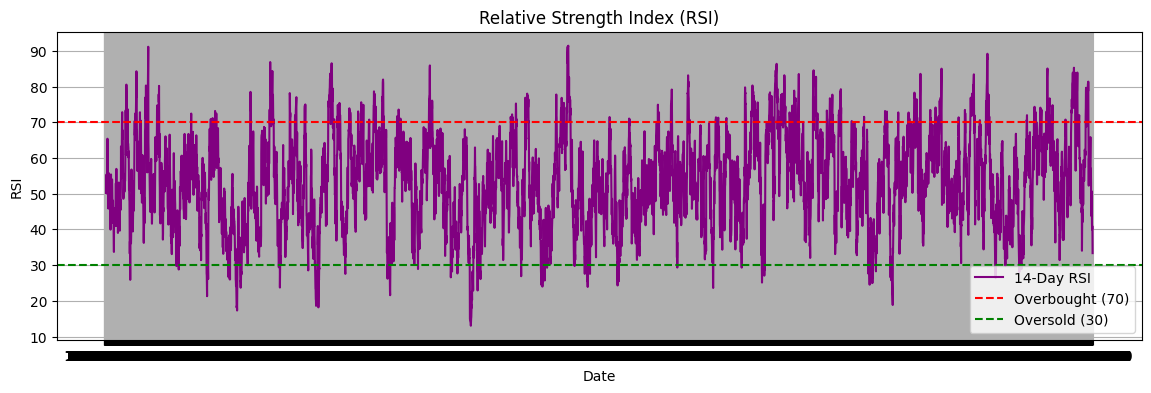

In [34]:
# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['RSI'], label='14-Day RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()

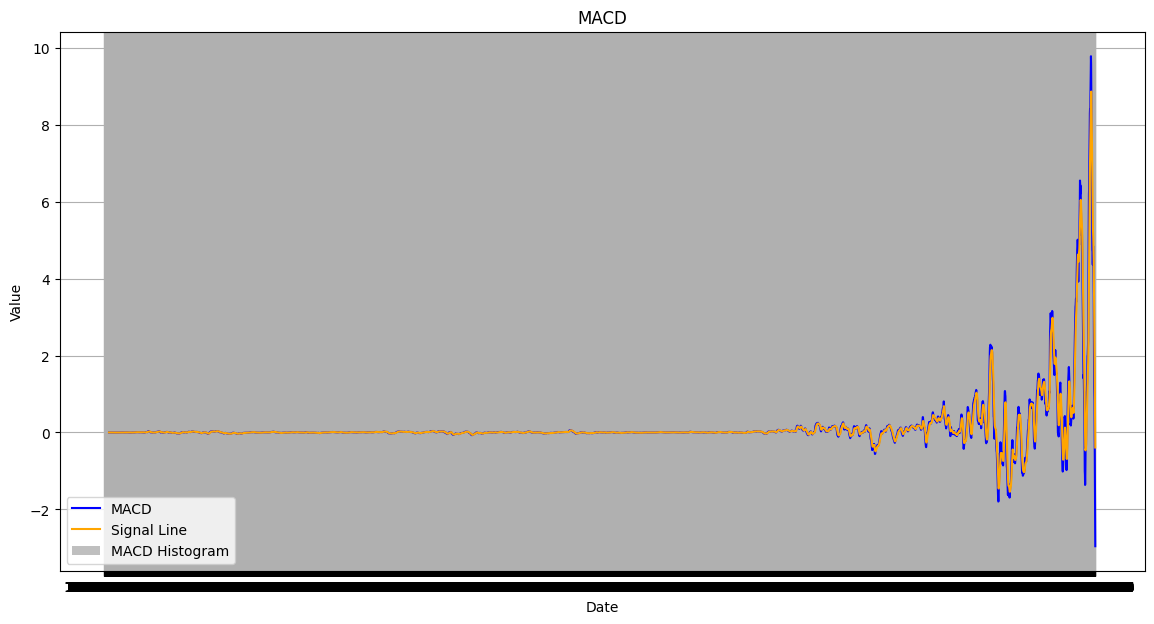

In [35]:
# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['MACD_Signal'], label='Signal Line', color='orange')
plt.bar(df['Date'], df['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()